In [1]:
import pandas as pd #importing lib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("corona.csv") #loading file

In [3]:
data.head(3)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,24-04-2020 03:30,34.223334,-82.461707,23,0,0,23,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,24-04-2020 03:30,30.295065,-92.414197,117,7,0,110,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,24-04-2020 03:30,37.767072,-75.632346,76,2,0,74,"Accomack, Virginia, US"


In [4]:
data.shape #getting shape

(3120, 12)

In [5]:
data.describe(include="object") #describing data with object only

,Admin2,Province_State,Country_Region,Last_Update,Combined_Key
count,2851,2939,3120,3120,3120
unique,1665,137,185,29,3120
top,Unassigned,Texas,US,24-04-2020 03:30,"Cannon, Tennessee, US"
freq,50,204,2858,2942,1


In [6]:
data.describe() # describing data with int values

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
count,2847.000000,3054.000000,3054.000000,3120.000000,3120.000000,3120.000000,3120.000000
mean,31316.349491,36.712174,-81.359555,868.232372,61.172436,236.694231,570.365705
std,17340.511055,9.843149,39.859738,8253.623736,880.391322,3608.304547,5377.349184
min,66.000000,-51.796300,-164.035380,0.000000,0.000000,0.000000,-80203.000000
25%,18122.000000,33.860682,-96.075619,5.000000,0.000000,0.000000,5.000000
50%,29133.000000,37.874280,-87.863429,21.000000,1.000000,0.000000,19.000000
75%,46053.000000,41.508094,-81.184465,104.000000,4.000000,0.000000,89.000000
max,99999.000000,71.706900,178.065000,213024.000000,25549.000000,103300.000000,129467.000000


In [7]:
data["active"]=data["Confirmed"]-data["Deaths"]-data["Recovered"] # active =confirmed -death-recovered
print(data["Active"])
res=data.groupby("Country_Region")['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index() #grouping and suming the total values 
res

0           23
1          110
2           74
3          621
4            1
5           58
6           12
7           47
8         1032
9            3
10          29
11           6
12          94
13         109
14           4
15          93
16          45
17           3
18          59
19          79
20           1
21         230
22          63
23        1306
24           7
25         728
26           6
27          68
28           4
29           8
         ...  
3090        33
3091       168
3092       263
3093       359
3094        22
3095        23
3096        59
3097       690
3098     80808
3099        28
3100      6479
3101      7063
3102    119340
3103       191
3104      1190
3105       175
3106        44
3107       384
3108         1
3109         1
3110        36
3111        22
3112        13
3113      1566
3114        18
3115       282
3116       103
3117       132
3118       149
3119       199
Name: Active, Length: 3120, dtype: int64


,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1279,42,179,1058
1,Albania,663,27,385,251
2,Algeria,3007,407,1355,1245
3,Andorra,723,37,333,353
4,Angola,25,2,6,17
5,Antigua and Barbuda,24,3,10,11
6,Argentina,3435,165,919,2351
7,Armenia,1523,24,659,840
8,Australia,6661,75,4124,2462
9,Austria,15002,522,11694,2786


In [8]:
maxvalue = data.groupby(['Country_Region', 'Province_State'])['Confirmed', 'Deaths', 'Recovered'].max() #grouping data and finding its max value
maxvalue

Confirmed  Deaths  Recovered
Country_Region Province_State                                            
Australia      Australian Capital Territory        104       3         88
               New South Wales                    2976      31       1379
               Northern Territory                   27       0          9
               Queensland                         1026       6        738
               South Australia                     438       4        331
               Tasmania                            207       8         67
               Victoria                           1337      16       1172
               Western Australia                   546       7        340
Canada         Alberta                            3720      68          0
               British Columbia                   1824      94          0
               Diamond Princess                      0       1          0
               Manitoba                            262       6          0
               New Brunswick                       118       0          0
               Newfoundland and Labrador           256       3          0
               Northwest Territories                 5       0          0
               Nova Scotia                         827      16          0
               Ontario                           14068     806          0
               Prince Edward Island                 26       0          0
               Quebec                            21838    1243          0
               Recovered                             0       0      14761
               Saskatchewan                        331       4          0
               Yukon                                11       0          0
China          Anhui                               991       6        984
               Beijing                             593       8        524
               Chongqing                           579       6        573
               Fujian                              355       1        346
               Gansu                               139       2        137
               Guangdong                          1585       8       1528
               Guangxi                             254       2        252
               Guizhou                             147       2        145
...                                                ...     ...        ...
US             Northern Mariana Islands             14       2          0
               Ohio                               2161      83          0
               Oklahoma                            634      26          0
               Oregon                              582      33          0
               Pennsylvania                      11226     443          0
               Puerto Rico                        1416      69          0
               Recovered                             0       0      80203
               Rhode Island                       4350     189          0
               South Carolina                      736      17          0
               South Dakota                       1636       5          0
               Tennessee                          1953      44          0
               Texas                              5330      82          0
               Utah                               1889      20          0
               Vermont                             395      27          0
               Virgin Islands                       54       3          0
               Virginia                           2362      83          0
               Washington                         5532     385          0
               West Virginia                       142       7          0
               Wisconsin                          2382     150          0
               Wyoming                             117       6          0
United Kingdom Anguilla                              3       0          1
               Bermuda                           

In [18]:
Indiadata = data[data['Country_Region']=='Indiana'] # cchecking india data 
Indiadata = Indiadata[[ "Province_State",'Confirmed', 'Deaths', 'Recovered']]
result = Indiadata.sort_values(by='Confirmed', ascending=False)
result = result.reset_index(drop=True)
print(result)

Empty DataFrame
Columns: [Province_State, Confirmed, Deaths, Recovered]
Index: []


In [17]:
chinadata = data[data['Country_Region']=='China'] #checking china data
chinadata = chinadata[[ "Province_State",'Confirmed', 'Deaths', 'Recovered']]

result = chinadata.sort_values(by='Confirmed', ascending=False) 
result = result.reset_index(drop=True)
print(result)

    Province_State  Confirmed  Deaths  Recovered
0            Hubei      68128    4512      63569
1        Guangdong       1585       8       1528
2            Henan       1276      22       1254
3         Zhejiang       1268       1       1256
4        Hong Kong       1035       4        699
5            Hunan       1019       4       1015
6            Anhui        991       6        984
7          Jiangxi        937       1        936
8     Heilongjiang        928      13        485
9         Shandong        787       7        766
10         Jiangsu        653       0        646
11        Shanghai        641       7        533
12         Beijing        593       8        524
13       Chongqing        579       6        573
14         Sichuan        561       3        558
15          Fujian        355       1        346
16           Hebei        328       6        317
17         Shaanxi        279       3        253
18         Guangxi        254       2        252
19          Shanxi  

In [11]:
data = data.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
print(data)
result = data[data['Deaths']>0][['Country_Region', 'Deaths']]
result

             Country_Region  Confirmed  Deaths  Recovered
0               Afghanistan       1279      42        179
1                   Albania        663      27        385
2                   Algeria       3007     407       1355
3                   Andorra        723      37        333
4                    Angola         25       2          6
5       Antigua and Barbuda         24       3         10
6                 Argentina       3435     165        919
7                   Armenia       1523      24        659
8                 Australia       6661      75       4124
9                   Austria      15002     522      11694
10               Azerbaijan       1548      20        948
11                  Bahamas         72      11         14
12                  Bahrain       2217       8       1082
13               Bangladesh       4186     127        108
14                 Barbados         76       6         30
15                  Belarus       8022      60        938
16            

,Country_Region,Deaths
0,Afghanistan,42
1,Albania,27
2,Algeria,407
3,Andorra,37
4,Angola,2
5,Antigua and Barbuda,3
6,Argentina,165
7,Armenia,24
8,Australia,75
9,Austria,522


In [12]:
data = data.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
print(data)
result = data[data['Recovered']==0][['Country_Region', 'Confirmed', 'Deaths', 'Recovered']]
result

             Country_Region  Confirmed  Deaths  Recovered
0               Afghanistan       1279      42        179
1                   Albania        663      27        385
2                   Algeria       3007     407       1355
3                   Andorra        723      37        333
4                    Angola         25       2          6
5       Antigua and Barbuda         24       3         10
6                 Argentina       3435     165        919
7                   Armenia       1523      24        659
8                 Australia       6661      75       4124
9                   Austria      15002     522      11694
10               Azerbaijan       1548      20        948
11                  Bahamas         72      11         14
12                  Bahrain       2217       8       1082
13               Bangladesh       4186     127        108
14                 Barbados         76       6         30
15                  Belarus       8022      60        938
16            

,Country_Region,Confirmed,Deaths,Recovered
22,Botswana,22,1,0
102,MS Zaandam,9,2,0
130,Papua New Guinea,8,0,0
144,Sao Tome and Principe,4,0,0
155,South Sudan,5,0,0
182,Yemen,1,0,0


In [13]:
result = data.groupby('Country_Region').max().sort_values(by='Confirmed', ascending=False)[:10]
result

,Confirmed,Deaths,Recovered
Country_Region,,,
US,869170,49954,80203
Spain,213024,22157,89250
Italy,189973,25549,57576
France,159460,21889,42762
Germany,153129,5575,103300
United Kingdom,139246,18791,712
Turkey,101790,2491,18491
Iran,87026,5481,64843
China,83884,4636,77983


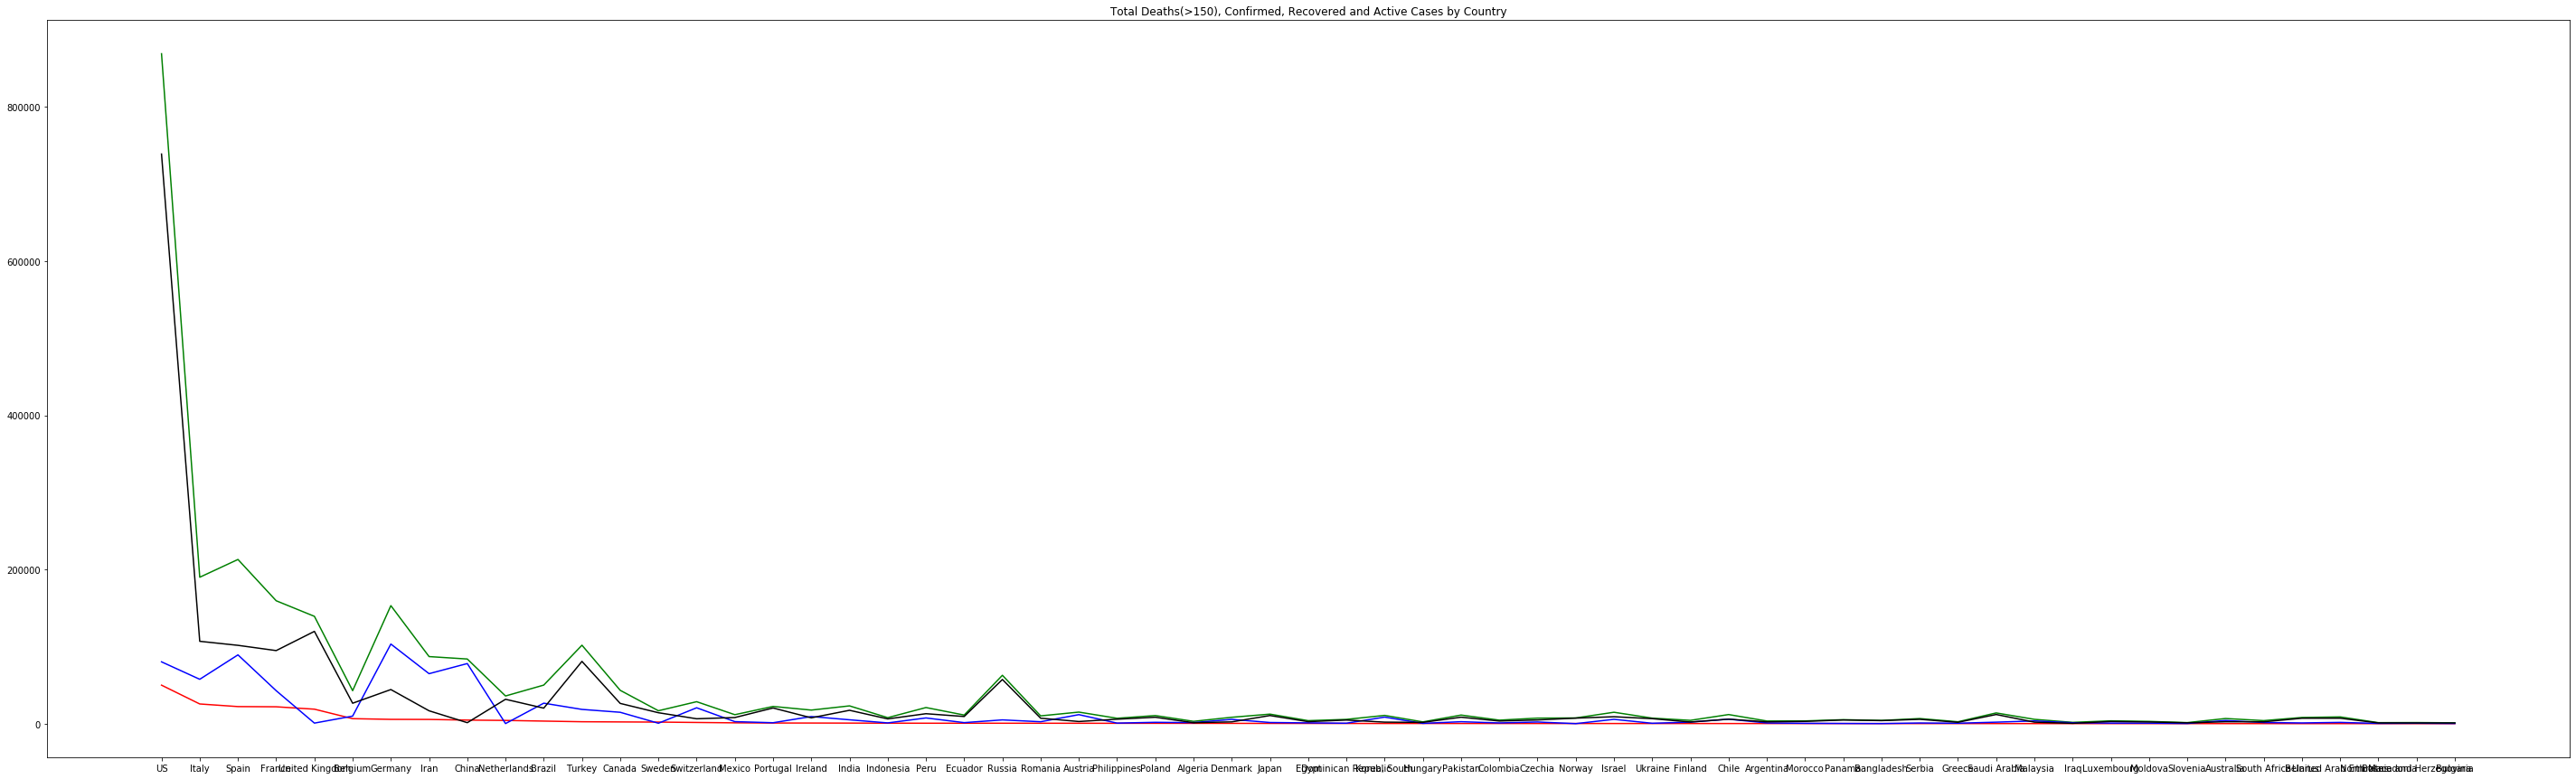

In [14]:
data['Active'] = data['Confirmed'] - data['Deaths'] - data['Recovered']
 
resultdata = data.groupby(["Country_Region"])["Deaths", "Confirmed", "Recovered", "Active"].sum().reset_index()
resultdata = resultdata.sort_values(by='Deaths', ascending=False)
resultdata = resultdata[resultdata['Deaths']>50]
plt.figure(figsize=(50, 15)) #l * H
plt.plot(resultdata['Country_Region'], resultdata['Deaths'],color='red')
plt.plot(resultdata['Country_Region'], resultdata['Confirmed'],color='green')
plt.plot(resultdata['Country_Region'], resultdata['Recovered'], color='blue')
plt.plot(resultdata['Country_Region'], resultdata['Active'], color='black')
 
plt.title('Total Deaths(>150), Confirmed, Recovered and Active Cases by Country')
plt.show()